# Residential property sales (2011-2016)

In [352]:
ourPrice = 859000

In [9]:
import pandas
data16 = pandas.read_excel('http://www.bouldercounty.org/doc/assessor/rec2016residential.xls')

In [10]:
data15 = pandas.read_excel('http://www.bouldercounty.org/doc/assessor/rec2015residential.xls')

In [185]:
data14 = pandas.read_excel('http://www.bouldercounty.org/doc/assessor/rec2014residential.xls')

In [240]:
data13 = pandas.read_excel('http://www.bouldercounty.org/doc/assessor/rec2013residential.xls')

In [241]:
data12 = pandas.read_excel('http://www.bouldercounty.org/doc/assessor/rec2012residential.xls')

In [242]:
data11 = pandas.read_excel('http://www.bouldercounty.org/doc/assessor/rec2011residential.xls')

## cropping the data to > 100k and < 2m

In [281]:
data = pandas.concat([data11, data12, data13, data14, data15, data16])
data = data[data['SALE_PRICE'] > 100000]
data = data[data['SALE_PRICE'] < 2000000]
len(data[data['ZIPCODE'] == '80304']['SALE_DATE'])

1310

In [272]:
print('number of sales (2011-2016): ', len(data))

number of sales (2011-2016):  29035


## Statistics (excluding any property < 100k or > 2m)


In [277]:
salePrices = data['SALE_PRICE']
print('Number of properties: {2:d}\n US$ min: {0:4.0f}k median: {1:4.0f}k avg: {3:4.0f}k  max: {4:4.0f}k'\
      .format(salePrices.min()/1e3, salePrices.median()/1e3, \
              len(salePrices), salePrices.mean()/1e3, salePrices.max()/1e3))

Number of properties: 29035
 US$ min:  100k median:  349k avg:  420k  max: 1995k


## Statistics for ZIP 80304

In [292]:
data80304 = pandas.concat([data[data['ZIPCODE'] == '80304'], data[data['ZIPCODE'] == 80304]])
#print(data80304['SALE_DATE'])
salePrices80304 = data80304['SALE_PRICE']
print('Number of properties: {2:d}\n US$ min: {3:4.0f}k median: {1:4.0f}k avg: {0:4.0f}k  max: {4:4.0f}k'.\
      format(salePrices80304.mean()/1e3, salePrices80304.median()/1e3,\
             len(salePrices80304), salePrices80304.min()/1e3, salePrices80304.max()/1e3))

Number of properties: 2401
 US$ min:  101k median:  548k avg:  619k  max: 1992k


## Price vs date of sale (ZIP 80304) for houses between 2000 - 3000 sqft

In [293]:
%matplotlib inline
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (15, 6)
dataFiltered = data80304[2000 < data80304['ABOVE_GROUND_SQFT']]
dataFiltered = dataFiltered[dataFiltered['ABOVE_GROUND_SQFT'] < 3000]
# remove very low and high prices
#dataFiltered = dataFiltered[dataFiltered['SALE_PRICE'] > 400000]
#dataFiltered = dataFiltered[dataFiltered['SALE_PRICE'] < 1200000]
dates, prices = dataFiltered['SALE_DATE'], dataFiltered['SALE_PRICE']

In [294]:
print('Number of properties: ', len(prices))

Number of properties:  493


In [298]:
import numpy
# convert to days
x = numpy.array([(d - dates.min()).days for d in dates])

In [339]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x.reshape(-1, 1), prices)
def linearRegression(days):
    return regr.intercept_ + regr.coef_[0]*days
m = regr.coef_[0]
xmin, xmax = x.min(), x.max()
fmin, fmax = linearRegression(xmin), linearRegression(xmax)
print('Price increase: ${0:3.0f}/day 2011: {1:4.0f}k latest: {2:4.0f}k'.format(m, fmin/1e3, fmax/1e3))

Price increase: $182/day 2011:  719k latest: 1063k


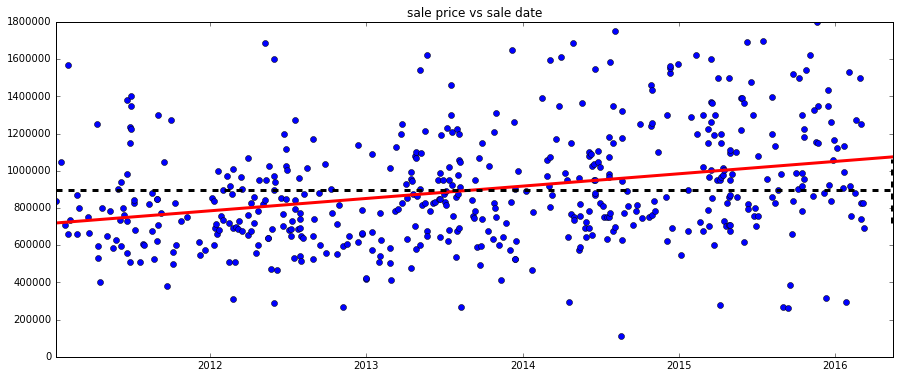

In [304]:
pyplot.plot(dates, prices,  'bo')
import datetime
now = datetime.datetime.strptime('15MAY2016', "%d%b%Y")
xLine = [dates.min(), now]
yLine = [fmin, linearRegression((now - dates.min()).days)]
pyplot.plot(xLine, yLine, 'r-', linewidth=3)
pyplot.plot(xLine, [ourPrice, ourPrice], 'k--', linewidth=3)
pyplot.plot([now, now], [fmin, fmax], 'k--', linewidth=5)
pyplot.title('sale price vs sale date')

## Price vs footage

In [340]:
footage = dataFiltered['ABOVE_GROUND_SQFT']
regr = linear_model.LinearRegression()
regr.fit(footage.reshape(-1,1), prices)
fmin, f = regr.predict(0.0)[0], regr.predict(2620)[0]
print('Land value: ${0:4.0f}k : value for 2620sqft is: ${1:4.0f}k'.format(fmin/1e3, f/1e3))

Land value: $  42k : value for 2620sqft is: $ 967k


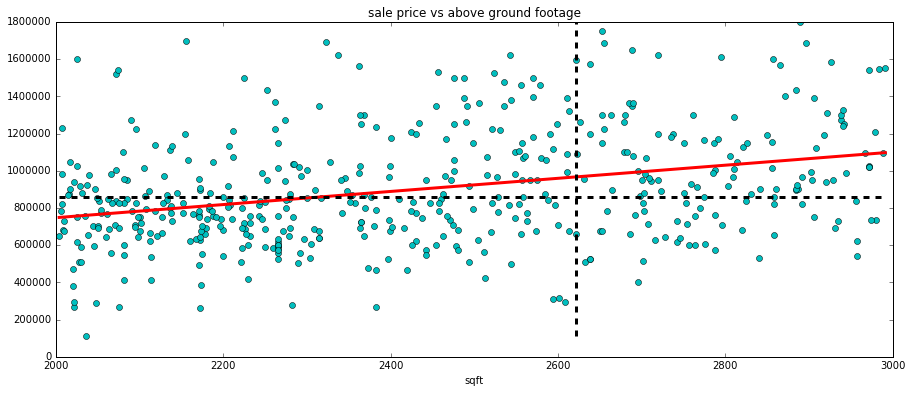

In [353]:
pyplot.plot(footage, prices,  'co')
xLine = [footage.min(), footage.max()]
yLine = [regr.intercept_ + footage.min()*regr.coef_, regr.intercept_ + footage.max()*regr.coef_]
pyplot.plot(xLine, yLine, 'r-', linewidth=3)
pyplot.plot(xLine, [ourPrice, ourPrice], 'k--', linewidth=3)
pyplot.plot([2622, 2622], [prices.min(), prices.max()], 'k--', linewidth=3)
pyplot.title('sale price vs above ground footage')
pyplot.xlabel('sqft')

## Price distribution (2015-2016)

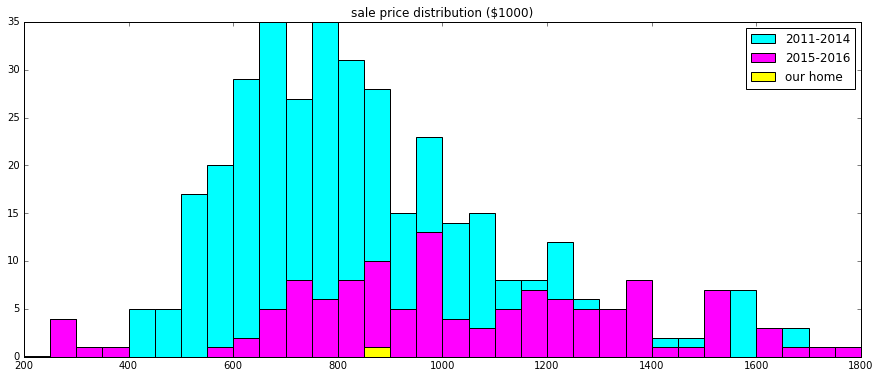

In [355]:
dataAfter2015 = dataFiltered[dataFiltered['SALE_DATE'] > data15['SALE_DATE'].min()]
dataBefore2015 = dataFiltered[dataFiltered['SALE_DATE'] < data15['SALE_DATE'].min()]
pyplot.hist(dataBefore2015['SALE_PRICE']/1e3, 
            color='cyan', 
            bins=numpy.linspace(200,1800, 33))
pyplot.hist(dataAfter2015['SALE_PRICE']/1e3, 
           color='magenta',
           bins=numpy.linspace(200,1800, 33))
pyplot.hist([ourPrice/1e3], 
           color = 'yellow', 
           bins=numpy.linspace(200,1800, 33))
pyplot.legend(['2011-2014', '2015-2016', 'our home'])
pyplot.title('sale price distribution ($1000)')


## What are the most popular prices in the range $800-920k?

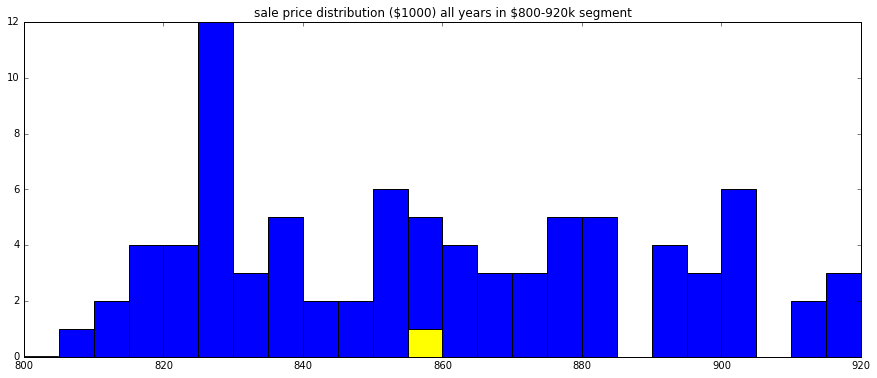

In [356]:
data800_900 = dataFiltered[dataFiltered['SALE_PRICE'] > 800000]
data800_900 = data800_900[data800_900['SALE_PRICE'] <= 920000]
pyplot.hist(data800_900['SALE_PRICE']/1e3, 
            color='blue', 
            bins=numpy.linspace(800,920, 25))
pyplot.hist([ourPrice/1e3], 
           color = 'yellow', 
           bins=numpy.linspace(800,920, 25))
pyplot.title('sale price distribution (\$1000) all years in \$800-920k segment')